## Grafo dirigido

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Crear un grafo dirigido

In [2]:
G = nx.Graph()

G.add_nodes_from(["A", "B", "C", "D", "E"])
G.add_edges_from([("A", "B"),
                  ("A", "D"),
                  ("B", "C"), 
                  ("C", "E"), 
                  ("D", "E")])

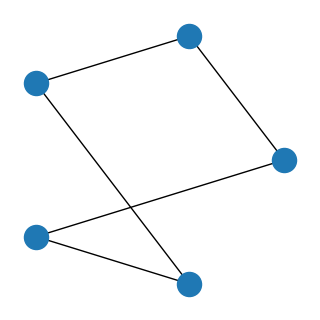

In [3]:

plt.figure(figsize=(3,3))

nx.draw_circular(G)

In [4]:
G = nx.DiGraph() # crear un grafo dirigido

G.add_nodes_from(["A", "B", "C", "D", "E"])
G.add_edges_from([("A", "B"),
                  ("A", "D"),
                  ("B", "C"), 
                  ("C", "E"), 
                  ("D", "E")])

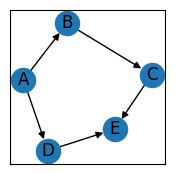

In [5]:

plt.figure(figsize = (2, 2))

nx.draw_networkx(G, arrows = True, arrowstyle = "-|>")

Crear dataframe con los datos de la matriz

In [6]:
df = pd.DataFrame(index = ["A", "B", "C", "D", "E"], columns = ["A", "B", "C", "D", "E"])

In [7]:
df.loc["A", "A"] = 0
df.loc["A", "B"] = 2.1
df.loc["B", "A"] = 8.6
df.loc["B", "C"] = 10.2
df.loc["C", "B"] = 7.3
df.loc["C", "E"] = 1.1
df.loc["E", "C"] = 3.56
df.loc["E", "D"] = 0.8
df.loc["D", "E"] = 4.2
df.loc["D", "A"] = 5.6
df.loc["A", "D"] = 7.5

df.fillna(0.00, inplace = True)

C:\Users\Ana\AppData\Local\Temp\ipykernel_33328\143834553.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0.00, inplace = True)


In [8]:
df

,A,B,C,D,E
A,0.0,2.1,0.00,7.5,0.0
B,8.6,0.0,10.20,0.0,0.0
C,0.0,7.3,0.00,0.0,1.1
D,5.6,0.0,0.00,0.0,4.2
E,0.0,0.0,3.56,0.8,0.0


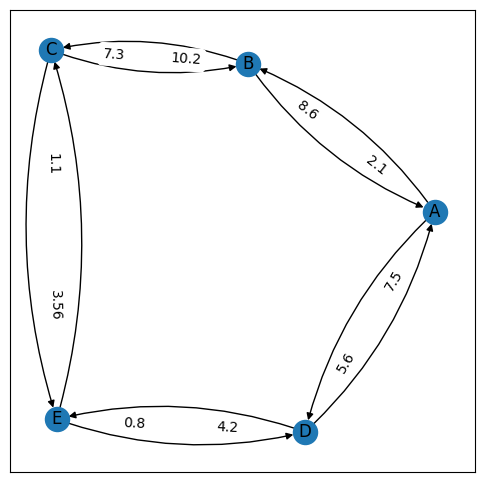

In [9]:
G = nx.from_pandas_adjacency(df, create_using = nx.DiGraph())

plt.figure(figsize = (6,6))
pos = nx.spring_layout(G) # generar posisciones aleatorias para los nodos
nx.draw_networkx(G, pos, with_labels = True, arrows = True, arrowstyle = "-|>", connectionstyle = "arc3, rad=0.15")

pesos = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, pesos, label_pos = 0.3);

In [10]:

pesos

{('A', 'B'): 2.1,
 ('A', 'D'): 7.5,
 ('B', 'A'): 8.6,
 ('B', 'C'): 10.2,
 ('C', 'B'): 7.3,
 ('C', 'E'): 1.1,
 ('D', 'A'): 5.6,
 ('D', 'E'): 4.2,
 ('E', 'C'): 3.56,
 ('E', 'D'): 0.8}

## TAREA

- calcular mapa de calor
- calcular los cuartiles
- seleccionar el umbral al 50% y hacer el mapa de calor (con ese umbral)

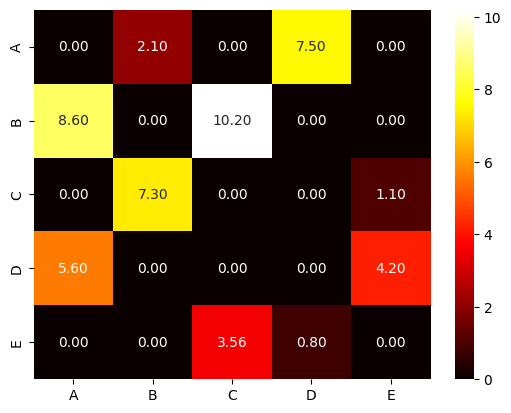

In [11]:
ax = sns.heatmap(df.values, 
                 annot = True, cmap = "hot", fmt = ".2f",
                 xticklabels = df.columns, yticklabels = df.columns)
plt.show()